<a href="https://colab.research.google.com/github/profedaniel86/Series_de_Tiempo/blob/main/5.%20DWT/DTW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentos de analítica 2 -Aprendizaje Automatico III (clase 5)

## Diego Fernando Agudelo - Daniel Felipe Osorio
## Universidad ICESI
## diegoagudelo30@gmail.com - dfosorio@icesi.edu.co

# ⏱️ Introducción al Dynamic Time Warping (DTW)

En esta clase aprenderás:

- Qué es el **Dynamic Time Warping (DTW)**.
- Por qué es útil para comparar y agrupar **series de tiempo** que pueden estar desfasadas.
- Cómo se **visualiza la alineación DTW**.
- Cómo usar DTW en clustering de series de tiempo


## 🤔 ¿Qué es el DTW?

El **Dynamic Time Warping (DTW)** es un algoritmo que encuentra la **mejor alineación temporal** entre dos series de tiempo.

A diferencia de la distancia Euclidiana, que compara punto a punto, el DTW permite:

- "Estirar" o "comprimir" regiones del tiempo.
- Comparar series **con desfases temporales**.
- Detectar similitudes en forma, sin importar el ritmo o alineación.




## 👣 Bajo el Capó
 La deformación temporal dinámica funciona calculando la distancia entre dos series de tiempo, A y B, encontrando una ruta a través de una matriz de costos que minimiza las distancias acumuladas entre ellas.

Formalmente se define con la siguiente formula:

$$
DTW(A, B) = \min \sqrt{\sum_{i,j} d(a_i, b_j)^2}
$$


donde ‘d(a_i, b_j)’ es la distancia entre los puntos ‘a_i’ de la serie A y ‘b_j’ de la serie B, y la suma se toma sobre todos los puntos (i, j) en la ruta de alineación óptima.




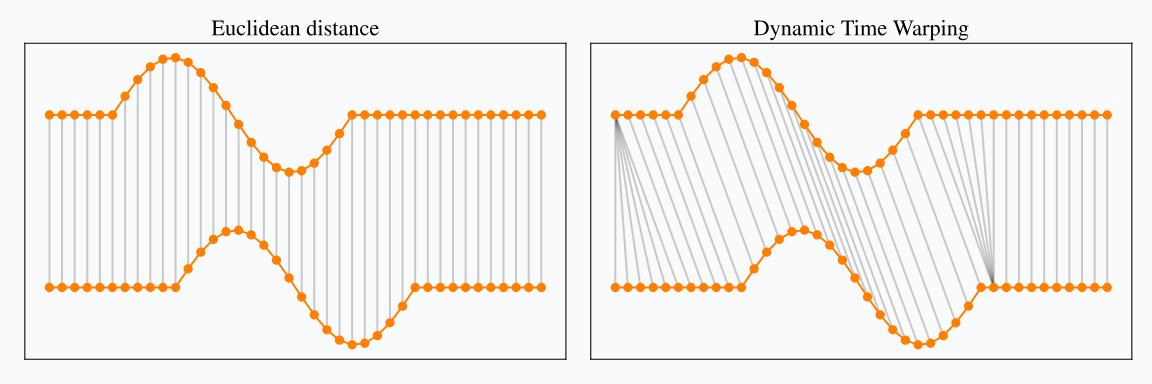

https://rtavenar.github.io/blog/dtw.html

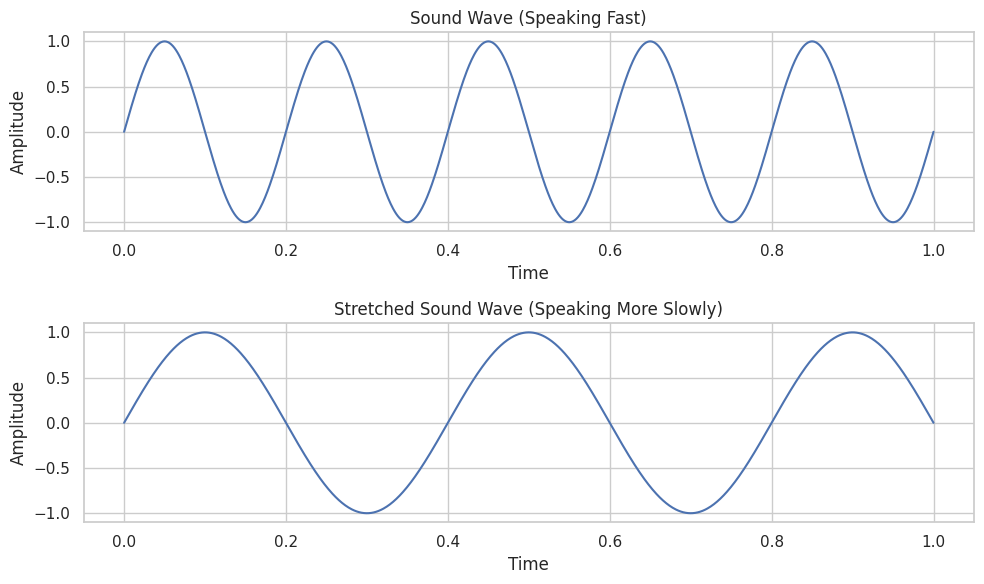

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a simple sound wave as an example
t = np.linspace(0, 1, 1000)
sound_wave_fast = np.sin(2 * np.pi * 5 * t)  # 5 Hz tone

# Stretching the sound wave to simulate speaking more slowly
# We'll simulate this by reducing the frequency
sound_wave_slow = np.sin(2 * np.pi * 2.5 * t)  # 2.5 Hz tone, half the original frequency

fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Plotting the fast speaking sound wave
axs[0].plot(t, sound_wave_fast)
axs[0].set_title('Sound Wave (Speaking Fast)')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')

# Plotting the stretched sound wave (speaking more slowly)
axs[1].plot(t, sound_wave_slow)
axs[1].set_title('Stretched Sound Wave (Speaking More Slowly)')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [ ]:
!pip install dtaidistance

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from dtaidistance import dtw
from scipy.stats import pearsonr
import pandas as pd

In [ ]:
np.random.seed(0)
time_series_a = np.cumsum(np.random.rand(20) * 2 - 1)
time_series_b = np.cumsum(np.random.rand(30) * 2 - 1 + np.sin(np.linspace(0, 3 * np.pi, 30)))
print(time_series_a)
print(time_series_b)

[0.09762701 0.52800574 0.73353249 0.82329886 0.67060846 0.96239668
 0.83757111 1.62111711 2.54844263 2.31532567 2.89877574 2.95656558
 3.0926547  3.94384798 3.0859201  2.2601787  1.30061549 1.96585518
 2.52216868 3.26219298]
[0.95723668 1.87485534 2.40298828 3.79173563 3.99183448 5.27020993
 5.48589323 7.13739312 7.69664362 7.74093794 7.16193014 7.29050842
 6.51510963 5.76846548 3.81921856 3.06766303 2.40834243 1.95451097
 2.42211802 2.6776396  2.61162584 3.00124361 4.15866806 4.20809572
 5.54016256 6.84498829 7.09344242 6.95646923 6.90662746 6.634049  ]


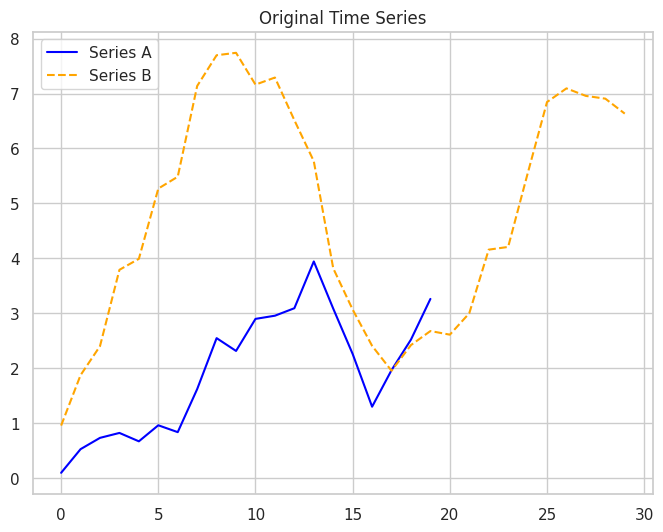

In [ ]:
np.random.seed(0)
time_series_a = np.cumsum(np.random.rand(20) * 2 - 1)
time_series_b = np.cumsum(np.random.rand(30) * 2 - 1 + np.sin(np.linspace(0, 3 * np.pi, 30)))

# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting the time series
ax1.plot(time_series_a, label='Series A', color='blue')
ax1.plot(time_series_b, label='Series B', linestyle='--', color='orange')

# Setting the title and legend
ax1.set_title('Original Time Series')
ax1.legend()

plt.show()

In [ ]:
distance, paths = dtw.warping_paths(time_series_a, time_series_b, use_c=False)
best_path = dtw.best_path(paths)
similarity_score = distance / len(best_path)

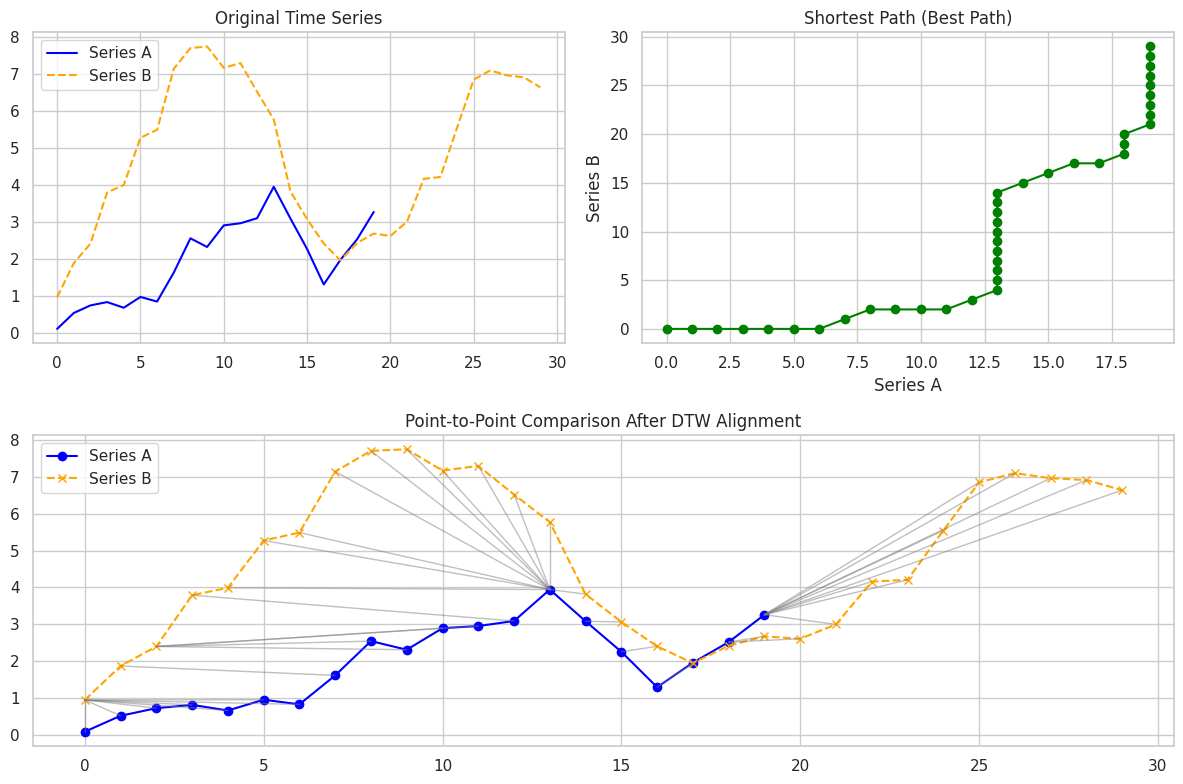

In [ ]:
plt.figure(figsize=(12, 8))

# Original Time Series Plot
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.plot(time_series_a, label='Series A', color='blue')
ax1.plot(time_series_b, label='Series B', linestyle='--',color='orange')
ax1.set_title('Original Time Series')
ax1.legend()

# Shortest Path Plot (Cost Matrix with the path)
# In this example, only the path is plotted, not the entire cost matrix.

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.plot(np.array(best_path)[:, 0], np.array(best_path)[:, 1], 'green', marker='o', linestyle='-')
ax2.set_title('Shortest Path (Best Path)')
ax2.set_xlabel('Series A')
ax2.set_ylabel('Series B')
ax2.grid(True)

# Point-to-Point Comparison Plot
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3.plot(time_series_a, label='Series A', color='blue', marker='o')
ax3.plot(time_series_b, label='Series B', color='orange', marker='x', linestyle='--')
for a, b in best_path:
    ax3.plot([a, b], [time_series_a[a], time_series_b[b]], color='grey', linestyle='-', linewidth=1, alpha = 0.5)
ax3.set_title('Point-to-Point Comparison After DTW Alignment')
ax3.legend()

plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame({
    'Metric': ['DTW Similarity Score'],
    'Value': [similarity_score]
})

results_df['Description'] = [
    "Lower scores indicate greater similarity between the time series."
]

results_df

,Metric,Value,Description
0,DTW Similarity Score,0.306018,Lower scores indicate greater similarity betwe...


In [ ]:
!pip install tslearn

## ⚔️ Comparación: DTW vs Distancia Euclidiana en Clustering

Ahora compararemos cómo se comportan dos algoritmos de clustering (K-Means):

- Usando **distancia Euclidiana**.
- Usando **DTW**.

Vamos a generar 3 tipos de series:

- Forma seno.
- Forma coseno.
- Forma cuadrada (signo del seno).

Las series son parecidas pero pueden estar **desfasadas**.


In [ ]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# Simular 3 grupos de series con distintas formas
np.random.seed(0)
n_series = 50
length = 40

group1 = np.sin(np.linspace(0, 3 * np.pi, length)) + np.random.normal(0, 0.1, (n_series//3, length))
group2 = np.cos(np.linspace(0, 3 * np.pi, length)) + np.random.normal(0, 0.1, (n_series//3, length))
group3 = np.sign(np.sin(np.linspace(0, 3 * np.pi, length))) + np.random.normal(0, 0.1, (n_series//3, length))

data = np.vstack([group1, group2, group3])
data = data[:, :, np.newaxis]  # tslearn espera shape (n, time, 1)

# Normalizar
data_scaled = TimeSeriesScalerMeanVariance().fit_transform(data)


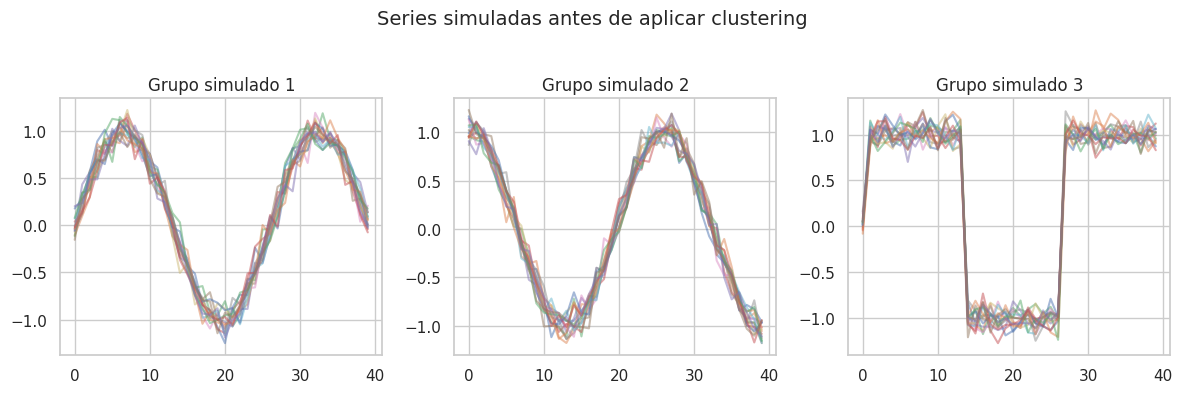

In [ ]:
plt.figure(figsize=(12, 4))
for i, group in enumerate([group1, group2, group3], start=1):
    plt.subplot(1, 3, i)
    for serie in group:
        plt.plot(serie, alpha=0.5)
    plt.title(f"Grupo simulado {i}")
plt.suptitle("Series simuladas antes de aplicar clustering", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 📏 Clustering con distancia Euclidiana

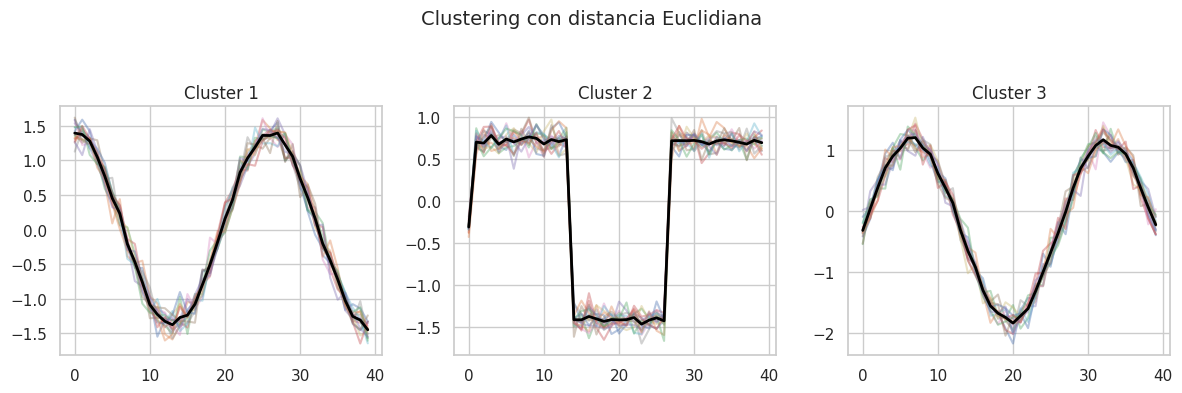

In [ ]:
model_euc = TimeSeriesKMeans(n_clusters=3, metric="euclidean", random_state=0)
labels_euc = model_euc.fit_predict(data_scaled)

# Visualizar
plt.figure(figsize=(12, 4))
for cluster_id in range(3):
    plt.subplot(1, 3, cluster_id + 1)
    for ts in data_scaled[labels_euc == cluster_id]:
        plt.plot(ts.ravel(), alpha=0.4)
    plt.plot(model_euc.cluster_centers_[cluster_id].ravel(), color="black", lw=2)
    plt.title(f"Cluster {cluster_id + 1}")
plt.suptitle("Clustering con distancia Euclidiana", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


### ⏱️ Clustering con DTW

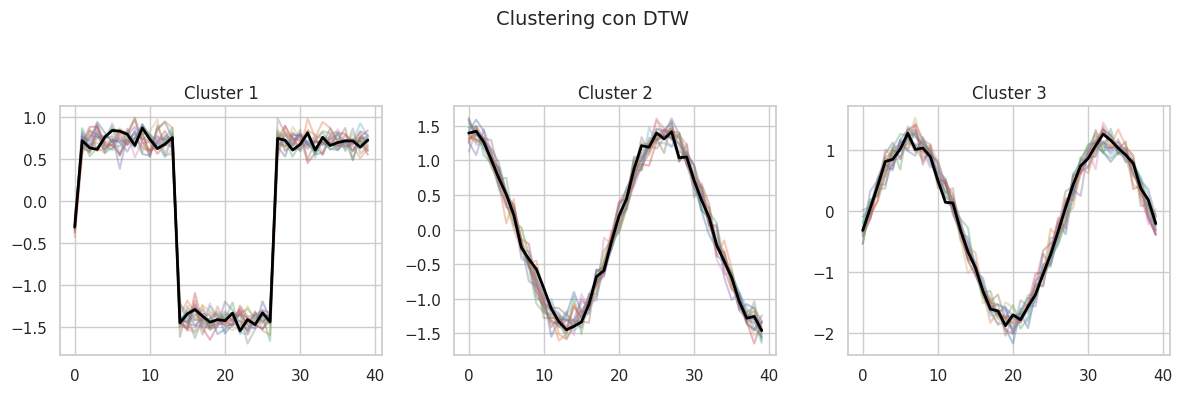

In [ ]:
model_dtw = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=0)
labels_dtw = model_dtw.fit_predict(data_scaled)

# Visualizar
plt.figure(figsize=(12, 4))
for cluster_id in range(3):
    plt.subplot(1, 3, cluster_id + 1)
    for ts in data_scaled[labels_dtw == cluster_id]:
        plt.plot(ts.ravel(), alpha=0.4)
    plt.plot(model_dtw.cluster_centers_[cluster_id].ravel(), color="black", lw=2)
    plt.title(f"Cluster {cluster_id + 1}")
plt.suptitle("Clustering con DTW", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


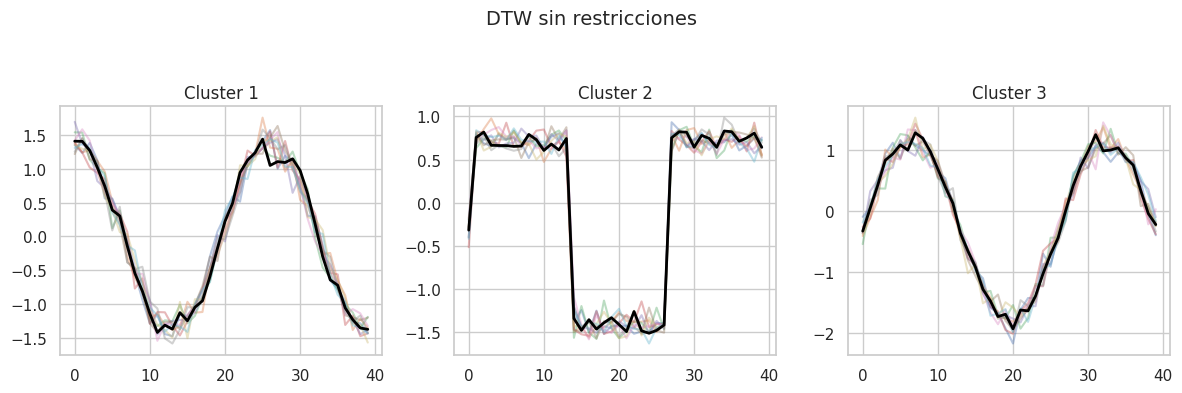

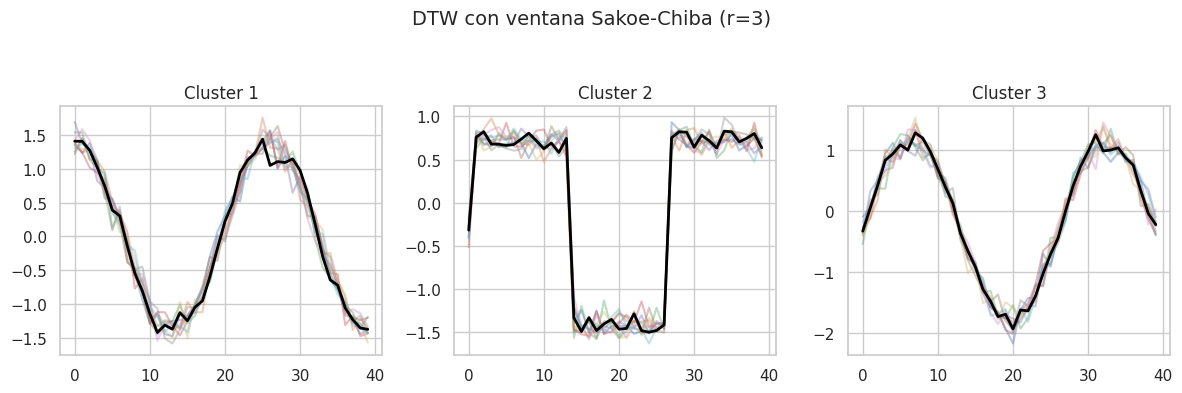

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import seaborn as sns

sns.set(style="whitegrid")

# Simular 3 grupos de series con distintas formas
np.random.seed(0)
n_series = 30
length = 40

group1 = np.sin(np.linspace(0, 3 * np.pi, length)) + np.random.normal(0, 0.1, (n_series//3, length))
group2 = np.cos(np.linspace(0, 3 * np.pi, length)) + np.random.normal(0, 0.1, (n_series//3, length))
group3 = np.sign(np.sin(np.linspace(0, 3 * np.pi, length))) + np.random.normal(0, 0.1, (n_series//3, length))

data = np.vstack([group1, group2, group3])
data = data[:, :, np.newaxis]  # tslearn espera shape (n_series, time, features)

# Normalizar
data_scaled = TimeSeriesScalerMeanVariance().fit_transform(data)

# Clustering con DTW sin ventana
model_dtw = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=0)
labels_dtw = model_dtw.fit_predict(data_scaled)

# Clustering con DTW + ventana Sakoe-Chiba
model_dtw_win = TimeSeriesKMeans(n_clusters=3, metric="dtw",
                                  metric_params={"global_constraint": "sakoe_chiba", "sakoe_chiba_radius": 3},
                                  random_state=0)
labels_dtw_win = model_dtw_win.fit_predict(data_scaled)

# Función para graficar clusters
def plot_clusters(data, labels, centers, title):
    plt.figure(figsize=(12, 4))
    for cluster_id in range(3):
        plt.subplot(1, 3, cluster_id + 1)
        for ts in data[labels == cluster_id]:
            plt.plot(ts.ravel(), alpha=0.4)
        plt.plot(centers[cluster_id].ravel(), color="black", lw=2)
        plt.title(f"Cluster {cluster_id + 1}")
    plt.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

# Visualizar resultados
plot_clusters(data_scaled, labels_dtw, model_dtw.cluster_centers_, "DTW sin restricciones")
plot_clusters(data_scaled, labels_dtw_win, model_dtw_win.cluster_centers_, "DTW con ventana Sakoe-Chiba (r=3)")


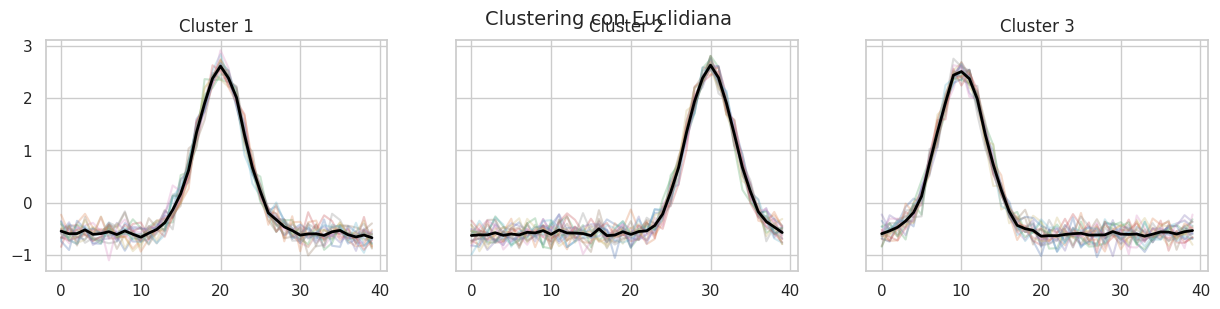

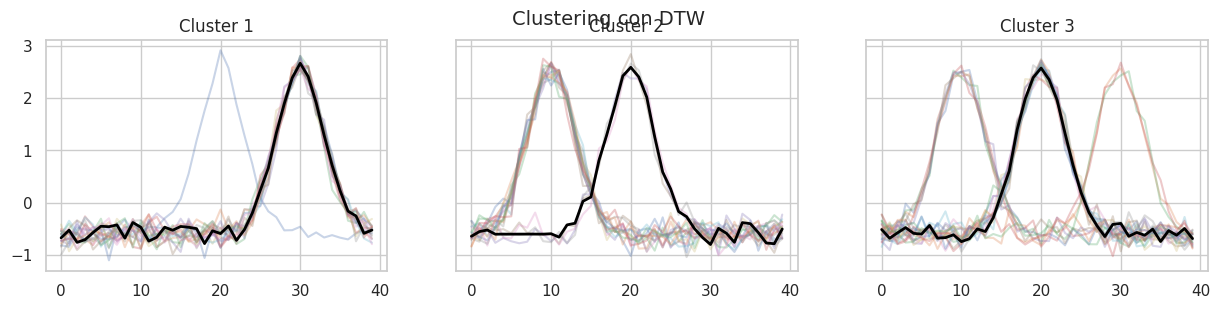

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import dtw
from tslearn.utils import to_time_series_dataset

# Simular 3 grupos de picos desplazados
np.random.seed(0)
n_series = 60
length = 40

def gaussian_peak(center, length=40, std=3):
    x = np.arange(length)
    return np.exp(-0.5 * ((x - center) / std) ** 2)

# Crear 3 grupos con el pico en diferentes posiciones
group1 = [gaussian_peak(10) + np.random.normal(0, 0.05, length) for _ in range(n_series//3)]
group2 = [gaussian_peak(20) + np.random.normal(0, 0.05, length) for _ in range(n_series//3)]
group3 = [gaussian_peak(30) + np.random.normal(0, 0.05, length) for _ in range(n_series//3)]

data = np.array(group1 + group2 + group3)
data = to_time_series_dataset(data)  # (n_series, length, 1)

# Normalizar
data_scaled = TimeSeriesScalerMeanVariance().fit_transform(data)

# Clustering con distancia Euclidiana
km_euc = TimeSeriesKMeans(n_clusters=3, metric="euclidean", random_state=0)
labels_euc = km_euc.fit_predict(data_scaled)

# Clustering con DTW
km_dtw = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=0)
labels_dtw = km_dtw.fit_predict(data_scaled)

# Visualización
def plot_clusters(data, labels, centroids, title):
    fig, axs = plt.subplots(1, 3, figsize=(15, 3), sharey=True)
    fig.suptitle(title, fontsize=14)
    for cluster in range(3):
        for ts in data[labels == cluster]:
            axs[cluster].plot(ts.ravel(), alpha=0.3)
        axs[cluster].plot(centroids[cluster].ravel(), color='black', linewidth=2)
        axs[cluster].set_title(f'Cluster {cluster+1}')
    plt.show()

plot_clusters(data_scaled, labels_euc, km_euc.cluster_centers_, "Clustering con Euclidiana")
plot_clusters(data_scaled, labels_dtw, km_dtw.cluster_centers_, "Clustering con DTW")

## 🧠 Conclusión

- La **distancia Euclidiana** puede fallar si las series están desfasadas.
- **DTW** reconoce patrones similares aunque no estén perfectamente alineados.
- DTW es muy útil para:
  - Agrupar sensores biológicos.
  - Detectar formas similares en ventas, clima, etc.
  - Procesamiento de señales y audio.

---

¿Listo para aplicarlo en tus propios datos? 🚀
